# 2020 Rotten Tomatoes Comments Sentiment Classification

Read the original file from Kaggle:

In [181]:
import pandas as pd
import re
import numpy as np
import os
df = pd.read_csv("rotten_tomatoes_critic_reviews.csv")

In [182]:
df.sort_values(by = "review_date", ascending = False)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
1116640,m/working_girl,Nicholas Bell,False,IONCINEMA.com,Fresh,4/5,2020-10-29,"A buoyant, emotionally gratifying underdog sto..."
1120068,m/x_the_man_with_the_x_ray_eyes,Matt Brunson,False,Film Frenzy,Fresh,3/4,2020-10-28,This nifty slice of sci-fi basically plays lik...
1078687,m/vernon_florida,Jordan M. Smith,False,IONCINEMA.com,Fresh,4/5,2020-10-28,"Vernon, Florida feels more like an endearingly..."
1058223,m/truman_show,Film Companion Staff,False,Film Companion,Fresh,NaN,2020-10-28,The ahead-of-its-time film spoke volumes about...
1024491,m/the_two_popes,Film Companion Staff,False,Film Companion,Fresh,NaN,2020-10-28,"Anthony Hopkins plays doubt-ridden, conservati..."
...,...,...,...,...,...,...,...,...
414340,m/hexed,NaN,True,Entertainment Weekly,Rotten,D-,1800-01-01,NaN
14139,m/10011950-three_blind_mice,NaN,False,National Post,Fresh,3.5/4,1800-01-01,NaN
184870,m/black_mask,NaN,True,Entertainment Weekly,Rotten,D,1800-01-01,NaN
91921,m/4321,Jennie Kermode,False,Eye for Film,Fresh,3.5/5,1800-01-01,NaN


Select all reviews published in the year of 2020

In [183]:
rslt_df = df.loc[df['review_date'] > "2019-12-31"]
rslt_df
rslt_df.sort_values(by = "review_date", ascending = False)

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
1116640,m/working_girl,Nicholas Bell,False,IONCINEMA.com,Fresh,4/5,2020-10-29,"A buoyant, emotionally gratifying underdog sto..."
1122024,m/yes_god_yes,Sadie Bell,False,Thrillist,Fresh,NaN,2020-10-28,It's a little Heaven-sent slice of comedy.
1078687,m/vernon_florida,Jordan M. Smith,False,IONCINEMA.com,Fresh,4/5,2020-10-28,"Vernon, Florida feels more like an endearingly..."
1078144,m/venom_2018,David Hogan,False,hoganreviews.co.uk,Fresh,3/5,2020-10-28,Has some fun set-pieces and worked around the ...
1073797,m/us_2019,Dennis Harvey,False,48 Hills,Fresh,NaN,2020-10-28,Peele's eagerly awaited second feature is here...
...,...,...,...,...,...,...,...,...
1003507,m/the_perfection,Dennis Harvey,True,Variety,Fresh,NaN,2020-01-01,Entertaining in a way that's at once showy and...
94195,m/6_underground,Josh Martin,False,Film Inquiry,Fresh,NaN,2020-01-01,"This is indeed a Michael Bay movie, and it has..."
681922,m/punishment_park,Judith Crist,True,New York Magazine/Vulture,Rotten,NaN,2020-01-01,The most offensive of the recent Festival film...
681921,m/punishment_park,Judith Crist,True,New York Magazine/Vulture,Rotten,NaN,2020-01-01,The most offensive of the recent Festival film...


Output to CSV file:

In [4]:
rslt_df.to_csv("2020Reviews.csv")

In [184]:
df = pd.read_csv("2020Reviews.csv")
df.head()

,Unnamed: 0,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,145,m/0814255,Sarah Knight Adamson,False,Sarah's Backstage Pass,Fresh,3/4,2020-01-13,As a former middle school teacher of gifted li...
1,146,m/0814255,Felicia Feaster,False,Charleston City Paper,Fresh,NaN,2020-01-23,The Lightning Thief is an admirable kid's fant...
2,147,m/0814255,Leigh Paatsch,False,Herald Sun (Australia),Rotten,2.5/5,2020-06-26,"OK, but only just."
3,148,m/0814255,Richard Propes,False,TheIndependentCritic.com,Rotten,2/4,2020-09-19,There's nothing resembling a spark in this fil...
4,289,m/0878835,Felicia Feaster,False,Charleston City Paper,Fresh,NaN,2020-01-22,Please Give is truly a film for our age; it's ...


In [185]:
Link_Review = df [["review_type", "review_score", "review_content"]]
Link_Review.head()

,review_type,review_score,review_content
0,Fresh,3/4,As a former middle school teacher of gifted li...
1,Fresh,NaN,The Lightning Thief is an admirable kid's fant...
2,Rotten,2.5/5,"OK, but only just."
3,Rotten,2/4,There's nothing resembling a spark in this fil...
4,Fresh,NaN,Please Give is truly a film for our age; it's ...


In [186]:
Link_Review["review_content"][0] # Row selection output testing

'As a former middle school teacher of gifted literature, I value all fairly well-made films for children and parents and this one is in that league.'

# I. Removal of all punctuation in the dataset using regex

In [187]:
Link_Review["review_content"] = Link_Review["review_content"].str.replace(r'[^\w\s]+', '')

<ipython-input-187-2c4d16282461>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Link_Review["review_content"] = Link_Review["review_content"].str.replace(r'[^\w\s]+', '')
<ipython-input-187-2c4d16282461>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Link_Review["review_content"] = Link_Review["review_content"].str.replace(r'[^\w\s]+', '')


In [9]:
Link_Review["review_content"][0] #Row selection output testing

'As a former middle school teacher of gifted literature I value all fairly wellmade films for children and parents and this one is in that league'

# II. Remove all numbers in comments (review_content column) (Need Justifications)

In [10]:
Link_Review["review_content"] = Link_Review["review_content"].str.replace('\d+', '') 

<ipython-input-10-509870383d32>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Link_Review["review_content"] = Link_Review["review_content"].str.replace('\d+', '')
<ipython-input-10-509870383d32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Link_Review["review_content"] = Link_Review["review_content"].str.replace('\d+', '')


# III. Adjust all words in comments to lower cases

In [11]:
Link_Review["review_content"] = Link_Review["review_content"].str.lower()

<ipython-input-11-64184f94b561>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Link_Review["review_content"] = Link_Review["review_content"].str.lower()


In [12]:
Link_Review["review_content"][0] #Row selection output testing

'as a former middle school teacher of gifted literature i value all fairly wellmade films for children and parents and this one is in that league'

# IV. Remove all stopwords in the comments (Need more modifications and cleanings) 

In [188]:
#NLTK Version
import tokenizer
import token
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize.toktok import ToktokTokenizer

stop1 = set(stopwords.words('english'))
# punctuation = list(string.punctuation)
tokenizer=ToktokTokenizer()
def stopword_remover1(text1):
    letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(text1))
    
    tokens = tokenizer.tokenize(text1)
    tokens = [token.strip() for token in tokens]
    filtered_words = [token for token in tokens if token.lower() not in stop1]
    filtered_text = " ".join(filtered_words)
    return filtered_text

Link_Review["review_content"] = Link_Review["review_content"].apply(stopword_remover1)
Link_Review.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samuelfan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-188-36b0c0957e94>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Link_Review["review_content"] = Link_Review["review_content"].apply(stopword_remover1)


,review_type,review_score,review_content
0,Fresh,3/4,former middle school teacher gifted literature...
1,Fresh,NaN,Lightning Thief admirable kids fantasy
2,Rotten,2.5/5,OK
3,Rotten,2/4,Theres nothing resembling spark film anywhere
4,Fresh,NaN,Please Give truly film age darkly comic stuff ...


In [189]:
#Scikit Learn Version
from nltk import ToktokTokenizer

from sklearn.feature_extraction import text
stop2 = text.ENGLISH_STOP_WORDS

tokenizer=ToktokTokenizer()
def stopword_remover2(text2):
    letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(text2))
    
    tokens = tokenizer.tokenize(text2)
    tokens = [token.strip() for token in tokens]
    filtered_words = [token for token in tokens if token.lower() not in stop2]
    filtered_text = " ".join(filtered_words)
    return filtered_text

Link_Review["review_content"] = Link_Review["review_content"].apply(stopword_remover2)
Link_Review.head()

<ipython-input-189-65d420dc3f2c>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Link_Review["review_content"] = Link_Review["review_content"].apply(stopword_remover2)


,review_type,review_score,review_content
0,Fresh,3/4,middle school teacher gifted literature value ...
1,Fresh,NaN,Lightning Thief admirable kids fantasy
2,Rotten,2.5/5,OK
3,Rotten,2/4,Theres resembling spark film
4,Fresh,NaN,truly film age darkly comic stuff mistress mis...


# V. Choosing Lemmatization over Stemming (Able to generate outputs with tokenized results)

In [190]:
from nltk.corpus import wordnet # To get words in dictionary with their parts of speech
from nltk.stem import WordNetLemmatizer # lemmatizes word based on it's parts of speech
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.porter import PorterStemmer

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatized_word(text):
    words = w_tokenizer.tokenize(text)
    lemmatized_text = " ".join([lemmatizer.lemmatize(word) for word in words])
    return lemmatized_text

Link_Review["review_content"] = Link_Review["review_content"].apply(lemmatized_word)
Link_Review.head()

#Still need justificaiton to explain why choosing lemmatization over stemming
#Explore feasibility of combining both lemmatization and stemming

<ipython-input-190-981741887fa0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Link_Review["review_content"] = Link_Review["review_content"].apply(lemmatized_word)


,review_type,review_score,review_content
0,Fresh,3/4,middle school teacher gifted literature value ...
1,Fresh,NaN,Lightning Thief admirable kid fantasy
2,Rotten,2.5/5,OK
3,Rotten,2/4,Theres resembling spark film
4,Fresh,NaN,truly film age darkly comic stuff mistress mis...


In [16]:
#Direct tokenization from pre-lemmatized data

#import nltk
#from nltk import sent_tokenize, word_tokenize
#nltk.download('punkt')
#nltk.download('wordnet')

#Link_Review["tokenized_review_content"] = Link_Review.apply(lambda row: nltk.word_tokenize(row["review_content"]), axis=1)
#Link_Review

# VI. Transform series to list

In [204]:
import re

type(Link_Review["review_content"]) #Determining type of the "review_content"

Series_Link_Review = Link_Review["review_content"]
Listed_Link_Review = Series_Link_Review.tolist()

type(Listed_Link_Review) #Confirmation for listed result

Listed_Link_Review

values = ','.join(map(str, Series_Link_Review))

In [18]:
#Top 200 Words Only

#from collections import Counter
#top50 = [x[0] for x in Counter(" ".join(Link_Review["review_content"]).split()).most_common(200)]
#top50

# VII. Get the 200 most frequent words

In [19]:
#Top 200 words with frequency
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(Listed_Link_Review, n=None):
    vec = CountVectorizer().fit(Listed_Link_Review)
    bag_of_words = vec.transform(Listed_Link_Review)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(Listed_Link_Review, 200)
for word, freq in common_words:
    print(word, freq)

film 10288
movie 5602
story 3387
like 3016
review 2651
make 2644
spanish 2557
performance 2476
character 2398
time 2386
feel 2043
good 1952
way 1825
work 1652
life 1532
best 1500
horror 1413
fun 1410
great 1394
doesnt 1314
comedy 1223
little 1215
director 1213
drama 1206
action 1198
love 1178
there 1136
really 1118
come 1082
end 1067
world 1037
thing 1036
thriller 1022
thats 1013
isnt 1008
moment 1004
new 965
year 958
look 938
entertaining 904
cast 898
better 878
people 868
audience 852
funny 837
man 829
lot 829
quite 823
watch 808
genre 794
right 789
bad 769
plot 763
documentary 763
tale 755
sense 742
bit 733
scene 731
fan 730
dont 728
real 727
far 708
long 703
kind 699
script 695
woman 681
know 678
heart 671
feature 671
narrative 671
family 664
actor 656
want 655
despite 643
turn 639
filmmaker 638
worth 637
experience 634
need 618
emotional 614
viewer 613
point 609
star 601
say 584
seen 582
play 582
interesting 582
piece 565
take 554
cinema 552
think 542
strong 536
watching 530
class

In [191]:
Link_Review['word_count'] = Link_Review['review_content'].str.count(' ') + 1
Link_Review.head()

<ipython-input-191-c89643d6ea5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Link_Review['word_count'] = Link_Review['review_content'].str.count(' ') + 1


,review_type,review_score,review_content,word_count
0,Fresh,3/4,middle school teacher gifted literature value ...,12
1,Fresh,NaN,Lightning Thief admirable kid fantasy,5
2,Rotten,2.5/5,OK,1
3,Rotten,2/4,Theres resembling spark film,4
4,Fresh,NaN,truly film age darkly comic stuff mistress mis...,9


In [21]:
import math
pd.Series.mean(Link_Review['word_count'])

11.426638394613736

In [ ]:
Link_Review['Sentiment'] = None
for i in range(len(Link_Review)): 
    if Link_Review['review_type'][i] == "Fresh": 
        Link_Review['Sentiment'][i] = 1
    else: 
        Link_Review['Sentiment'][i] = -1

In [193]:
Link_Review.head()
# specify why choose 1 and -1 in the report
# look up explanantions online, must be a reason. Maybe 1 and -1 opposite

,review_type,review_score,review_content,word_count,Sentiment
0,Fresh,3/4,middle school teacher gifted literature value ...,12,1
1,Fresh,NaN,Lightning Thief admirable kid fantasy,5,1
2,Rotten,2.5/5,OK,1,-1
3,Rotten,2/4,Theres resembling spark film,4,-1
4,Fresh,NaN,truly film age darkly comic stuff mistress mis...,9,1


In [194]:
selected_words = pd.read_csv("Selected Sentiment Words from Top 200 Most Frequent Words.txt", sep = " ", header = None)
selected_words.columns = ["Word", "Word_Count", "Positivity"]
selected_words.head()

,Word,Word_Count,Positivity
0,like,3016,True
1,good,1952,True
2,best,1500,True
3,horror,1413,False
4,fun,1410,True


In [25]:
words_only = selected_words["Word"]
listed_words_only = list(words_only)
#Link_Review['Word_score'] = 0
#for i in range(len(listed_words_only)): 
 #   for j in range(len(Link_Review['review_content'])): 
  #      if listed_words_only[i] in Link_Review['review_content'][j]: 
   #         Link_Review['Word_score'][j] += 1
    #    else: 
     #       Link_Review['Word_score'][j] = 0

# Vectorize feature with top 65 most common words

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
cv_train = cv.fit_transform(Link_Review["review_content"])

In [27]:
list_1 = []
for i in range(len(listed_words_only)): 
    n = cv.get_feature_names().index(listed_words_only[i])
    list_1.append(n)
list_1

[18194,
 13107,
 2815,
 14886,
 12298,
 13353,
 8720,
 18321,
 18579,
 21321,
 10027,
 2849,
 12331,
 18554,
 25212,
 26643,
 2140,
 3015,
 8803,
 25548,
 10916,
 18457,
 17270,
 34716,
 35642,
 9758,
 16184,
 30636,
 5361,
 5919,
 2902,
 33190,
 22354,
 15074,
 32910,
 13939,
 17569,
 7332,
 32925,
 24502,
 2545,
 35869,
 5261,
 24261,
 11122,
 24258,
 23312,
 28877,
 29548,
 294,
 10964,
 34439,
 32950,
 10034,
 22066,
 10229,
 28610,
 9476,
 31083,
 9956,
 9357,
 11366,
 8202,
 9954,
 11383]

In [28]:
# split df - positive and negative sentiment:
positive = Link_Review[Link_Review['Sentiment'] == 1]
negative = Link_Review[Link_Review['Sentiment'] == -1]

# Save Finalized data and Load 

In [138]:
finalized_reviews = Link_Review[['review_content','Sentiment']]
finalized_reviews.head()

,review_content,Sentiment
0,middle school teacher gifted literature value ...,1
1,lightning thief admirable kid fantasy,1
2,ok,-1
3,there resembling spark film,-1
4,truly film age darkly comic stuff mistress mis...,1


In [139]:
finalized_reviews.to_csv("finalized_reviews.csv")

In [140]:
from sklearn.model_selection import train_test_split
X_data = Link_Review[['review_content']]
y_data = Link_Review['Sentiment'].values

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, 
                                                    test_size = 0.2, 
                                                    random_state=1, 
                                                    stratify = y_data)
X_train_sub, X_valid, y_train_sub, y_valid = train_test_split(X_train, y_train, 
                                                              test_size = 0.2, 
                                                              random_state=1, 
                                                              stratify = y_train)

print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape)
print('y_test.shape:', y_test.shape)
print('Train/Valid/Test sizes:', y_train.shape[0], y_valid.shape[0], y_test.shape[0])

X_train.shape: (36596, 1)
y_train.shape: (36596,)
X_test.shape: (9150, 1)
y_test.shape: (9150,)
Train/Valid/Test sizes: 36596 7320 9150


In [141]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
# vectorize X_train and X_test
train_matrix = vec.fit_transform(X_train['review_content'])
test_matrix = vec.transform(X_test['review_content'])
# vectorize X_train_sub and X_valid
# train_sub_matrix = vec.fit_transform(X_train_sub['review_content'])
# valid_matrix = vec.transform(X_valid['review_content'])

In [142]:
X_train = train_matrix
X_test = test_matrix
y_train = y_train.astype('int')
y_test = y_test.astype('int')
# X_train_sub = train_sub_matrix
# X_valid = valid_matrix
# y_train_sub = y_train_sub.astype('int')
# y_valid = y_valid.astype('int')

# print dimensions
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# print(X_train_sub.shape)
# print(y_train_sub.shape)
# print(X_valid.shape)
# print(y_valid.shape)

(36596, 32922)
(36596,)
(9150, 32922)
(9150,)


In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import StackingCVClassifier

%matplotlib inline
import matplotlib.pyplot as plt

# Model Fitting and Model Selection

## KNN

In [202]:
knn = KNeighborsClassifier(n_neighbors=7) 
knn.fit(X_train, y_train)
print(f"Train Accuracy: {knn.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {knn.score(X_test, y_test)*100:0.3f}%")

Train Accuracy: 79.175%
Test Accuracy: 71.672%


In [110]:
pred_train, pred_test = [], []

intervals = np.arange(500, X_train.shape[0] + 1, 200)

for i in intervals:
    knn.fit(X_train[:i], y_train[:i])
    p_train = knn.score(X_train[:i], y_train[:i])
    p_test = knn.score(X_test, y_test)
    pred_train.append(p_train)
    pred_test.append(p_test)

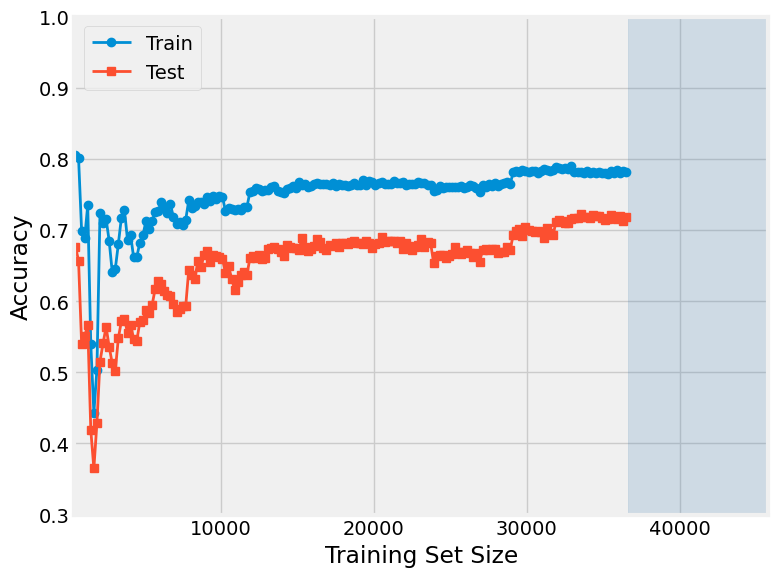

In [125]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=100)
with plt.style.context(('fivethirtyeight')):
    plt.plot(intervals, pred_train, marker='o', label='Train', linewidth = 2)
    plt.plot(intervals, pred_test, marker='s', label='Test', linewidth = 2)
    plt.legend(loc='best', numpoints=1)
    plt.xlim([430, X_train.shape[0] + X_test.shape[0]])
    plt.axvspan(X_train.shape[0], 
                X_train.shape[0] + X_test.shape[0], 
                alpha=0.2, 
                color='steelblue')
    plt.ylim([0.3, 1.0])
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.tight_layout()
    # plt.savefig('figures/model-eval-mnist_0.svg')

## Random Forest

In [147]:
random_forest_model = RandomForestClassifier(criterion='entropy', n_estimators=100,
                                random_state=1)
random_forest_model.fit(X_train, y_train)
print(f"Train Accuracy: {random_forest_model.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {random_forest_model.score(X_test, y_test)*100:0.3f}%")

Train Accuracy: 99.975%
Test Accuracy: 81.781%


RandomForest: criterion='entropy', n_estimator = 150, max_depth = None: Train Accuracy: 99.975%, test Accuracy: 81.781%

### Try: class_weight='balanced'

In [145]:
random_forest_model = RandomForestClassifier(criterion='entropy', n_estimators=100,
                                random_state=1, class_weight='balanced')
random_forest_model.fit(X_train, y_train)
print(f"Train Accuracy: {random_forest_model.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {random_forest_model.score(X_test, y_test)*100:0.3f}%")

Train Accuracy: 99.973%
Test Accuracy: 82.251%


## Stacking (discard)

In [36]:
clf1 = KNeighborsClassifier(n_neighbors=9)
clf2 = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=1)
lr = LogisticRegression(random_state=123)
sclf = StackingCVClassifier(classifiers=[clf1, clf2], 
                            meta_classifier=lr, 
                            use_probas=True, # changed
                            drop_proba_col='last',
                            #use_features_in_secondary=True,
                            cv=10,
                            random_state=1)
sclf.fit(X_train, y_train)
print(f"Train Accuracy: {sclf.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {sclf.score(X_test, y_test)*100:0.3f}%")

Train Accuracy: 99.973%
Test Accuracy: 81.738%


## Logistic Regression

In [179]:
lr = LogisticRegression(random_state=1, C=0.78, max_iter=10000)
lr.fit(X_train, y_train)
print(f"Train Accuracy: {lr.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {lr.score(X_test, y_test)*100:0.3f}%")

Train Accuracy: 92.281%
Test Accuracy: 82.186%


## Gradient Boost

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
boost = GradientBoostingClassifier(learning_rate=0.1, 
                                   n_estimators=100, 
                                   max_depth=9, 
                                   random_state=1)
boost.fit(X_train, y_train)
print(f"Train Accuracy: {boost.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {boost.score(X_test, y_test)*100:0.3f}%")

Train Accuracy: 79.613%
Test Accuracy: 76.492%


## Bagging with Decision Tree

In [77]:
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(random_state=1, criterion='gini', max_depth=10)
bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=100,
                        oob_score=True,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)
bag.fit(X_train, y_train)
print(f"Train Accuracy: {bag.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {bag.score(X_test, y_test)*100:0.3f}%")

Train Accuracy: 74.167%
Test Accuracy: 73.694%


## Bagging with Logistic Regression

In [198]:
lr = LogisticRegression(random_state=1, C=0.78, max_iter = 10000)

In [199]:
bag_lr_100 = BaggingClassifier(base_estimator=lr,
                        n_estimators=100,
                        oob_score=True,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)
bag_lr_100.fit(X_train, y_train)
print(f"Train Accuracy: {bag_lr_100.score(X_train, y_train)*100:0.3f}%")
print(f"Test Accuracy: {bag_lr_100.score(X_test, y_test)*100:0.3f}%")

Train Accuracy: 90.750%
Test Accuracy: 81.716%
